In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mason_functions as mf
import explore
import wrangle
import scale 

In [2]:
#load data
df = pd.read_csv('employee_attrition.xls', index_col = 0)

#preview data
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                  

Education
* 1 'Below College'
* 2 'College'
* 3 'Bachelor'
* 4 'Master'
* 5 'Doctor'
 
EnvironmentSatisfaction
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'
 
JobInvolvement 
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'
 
JobSatisfaction 
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'
 
PerformanceRating 
* 1 'Low'
* 2 'Good'
* 3 'Excellent'
* 4 'Outstanding'
 
RelationshipSatisfaction 
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'
 
WorkLifeBalance 
* 1 'Bad'
* 2 'Good'
* 3 'Better'
* 4 'Best'

In [4]:
#get rid of camel-case (lower case all of the columns) 
df.columns = df.columns.str.lower()

In [5]:
#rename columns
df = df.rename(columns = {'businesstravel': 'business_travel',
                          'dailyrate': 'daily_rate',
                          'distancefromhome': 'distance_from_home',
                          'educationfield': 'education_field',
                          'employeecount': 'employee_count',
                          'employeenumber': 'employee_id',
                          'environmentsatisfaction': 'environment_satisfaction',
                          'hourlyrate': 'hourly_rate',
                          'jobinvolvement': 'job_involvement',
                          'joblevel': 'job_level',
                          'jobrole': 'job_role',
                          'jobsatisfaction': 'job_satisfaction',
                          'maritalstatus': 'marital_status',
                          'monthlyincome': 'monthly_income',
                          'monthlyrate': 'monthly_rate',
                          'numcompaniesworked': 'companies_worked',
                          'percentsalaryhike': 'percent_salary_hike',
                          'performancerating': 'performance_rating',
                          'relationshipsatisfaction': 'relationship_satisfaction',
                          'standardhours': 'standard_hours',
                          'stockoptionlevel': 'stock_option_level',
                          'totalworkingyears': 'total_working_years',
                          'trainingtimeslastyear': 'hours_trained_last_year',
                          'worklifebalance': 'work_life_balance',
                          'yearsatcompany': 'company_years',
                          'yearsincurrentrole': 'current_role_years',
                          'yearssincelastpromotion': 'years_since_last_promotion',
                          'yearswithcurrmanager': 'years_with_manager'
                         }
              )

In [6]:
#gather all the columns with numeric data types in a list
#numeric = df.columns[df.dtypes == 'int64'].to_list()

I want to explore differences in model performance from discrete features. I will make a list of out of the discrete variables. For items in this list, the item can be measured on a scale from 1 to 4 (except the education, that is on a scale of 1 to 5), or the item can be viewed as a category.

In [10]:
#check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   attrition                   1470 non-null   object
 1   business_travel             1470 non-null   object
 2   daily_rate                  1470 non-null   int64 
 3   department                  1470 non-null   object
 4   distance_from_home          1470 non-null   int64 
 5   education                   1470 non-null   int64 
 6   education_field             1470 non-null   object
 7   employee_count              1470 non-null   int64 
 8   employee_id                 1470 non-null   int64 
 9   environment_satisfaction    1470 non-null   int64 
 10  gender                      1470 non-null   object
 11  hourly_rate                 1470 non-null   int64 
 12  job_involvement             1470 non-null   int64 
 13  job_level                   1470 non-null   int64

I want to get a feel for the data I am about to explore, and I would like to separate the data into numeric, categorical and discrete features. I will now loop through all of the columns to get a better feel as to what's available and what goes where.

In [11]:
#loop through columns to print number of unique values that each feature has
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')
    print('---')

attrition: 2
---
business_travel: 3
---
daily_rate: 886
---
department: 3
---
distance_from_home: 29
---
education: 5
---
education_field: 6
---
employee_count: 1
---
employee_id: 1470
---
environment_satisfaction: 4
---
gender: 2
---
hourly_rate: 71
---
job_involvement: 4
---
job_level: 5
---
job_role: 9
---
job_satisfaction: 4
---
marital_status: 3
---
monthly_income: 1349
---
monthly_rate: 1427
---
companies_worked: 10
---
over18: 1
---
overtime: 2
---
percent_salary_hike: 15
---
performance_rating: 2
---
relationship_satisfaction: 4
---
standard_hours: 1
---
stock_option_level: 4
---
total_working_years: 40
---
hours_trained_last_year: 7
---
work_life_balance: 4
---
company_years: 37
---
current_role_years: 19
---
years_since_last_promotion: 16
---
years_with_manager: 18
---


Which features will I leave behind? Which ones will I dummy?

In [12]:
#loop through columns, and print out values and counts for each feature
for col in df.columns:
    print(col)
    print('---')
    print(df[col].value_counts())
    print('==============')
    print('              ')

attrition
---
No     1233
Yes     237
Name: attrition, dtype: int64
              
business_travel
---
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: business_travel, dtype: int64
              
daily_rate
---
691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: daily_rate, Length: 886, dtype: int64
              
department
---
Research & Development    961
Sales                     446
Human Resources            63
Name: department, dtype: int64
              
distance_from_home
---
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
17     20
12     20
22     19
13     19
21     18
27     12
Name: distance_from_home, dtype: int64
              
education
---
3    572
4    398
2    282
1    170
5     48
Name: e

In [21]:
#set a list of categorical columns based on the columns above
categorical = ['attrition',
               'business_travel',
               'department',
               'education_field',
               'gender',
               'job_role',
               'marital_status',
               'overtime'
              ]

#set a list of discrete columns
discrete = ['education',
            'environment_satisfaction',
            'job_involvement',
            'job_level',
            'job_satisfaction',
            'performance_rating',
            'relationship_satisfaction', 
            'stock_option_level',
            'work_life_balance'
           ]

#set a list of numeric columns
numeric = ['daily_rate',
           'distance_from_home',
           'education',
           'environment_satisfaction',
           'hourly_rate',
           'job_involvement',
           'job_level',
           'job_role',
           'job_satisfaction',
           'monthly_income',
           'monthly_rate',
           'companies_worked',
           'percent_salary_hike',
           'performance_rating',
           'relationship_satisfaction',
           'stock_option_level',
           'total_working_years',
           'hours_trained_last_year',
           'work_life_balance',
           'company_years',
           'current_role_years',
           'years_since_last_promotion',
           'years_with_manager'
          ]

#set a list of columns to drop
superfluous = ['employee_count', 'over18', 'standard_hours']

#drop these columns
df = df.drop(columns = superfluous)

In [22]:
for cat in categorical:
    print(cat)
    print('---')
    print(df[cat].value_counts())
    print('==============')
    print('              ')

attrition
---
No     1233
Yes     237
Name: attrition, dtype: int64
              
business_travel
---
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: business_travel, dtype: int64
              
department
---
Research & Development    961
Sales                     446
Human Resources            63
Name: department, dtype: int64
              
education_field
---
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: education_field, dtype: int64
              
gender
---
Male      882
Female    588
Name: gender, dtype: int64
              
job_role
---
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: job_r

In [23]:
#map simple categorical columns to 1 and 0
df.attrition = df.attrition.map({'No': 0, 'Yes': 1})
df.overtime = df.overtime.map({'No': 0, 'Yes': 1})

#remove attrition and overtime since we just one-hot encoded them already
categorical.remove('attrition')
categorical.remove('overtime')

In [24]:
#assign dataframe to dummied variables
dummies = pd.get_dummies(df[categorical], drop_first = False)

#preview
dummies.head()

,attrition,overtime,business_travel_Non-Travel,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_field_Human Resources,education_field_Life Sciences,...,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Divorced,marital_status_Married,marital_status_Single
Age,,,,,,,,,,,,,,,,,,,,,
41,1,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
49,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
37,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
33,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
27,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [25]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   attrition                           1470 non-null   int64
 1   overtime                            1470 non-null   int64
 2   business_travel_Non-Travel          1470 non-null   uint8
 3   business_travel_Travel_Frequently   1470 non-null   uint8
 4   business_travel_Travel_Rarely       1470 non-null   uint8
 5   department_Human Resources          1470 non-null   uint8
 6   department_Research & Development   1470 non-null   uint8
 7   department_Sales                    1470 non-null   uint8
 8   education_field_Human Resources     1470 non-null   uint8
 9   education_field_Life Sciences       1470 non-null   uint8
 10  education_field_Marketing           1470 non-null   uint8
 11  education_field_Medical             1470 non-null   uint8
 12  educati

In [28]:
#replace superfluous string with nothing
dummies.columns = dummies.columns.str.replace('business_travel_', '').\
str.replace('department_', '').\
str.replace('education_field_', '').\
str.replace('gender_', '').\
str.replace('job_role_', '').\
str.replace('marital_status_', '')

In [29]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   attrition                  1470 non-null   int64
 1   overtime                   1470 non-null   int64
 2   Non-Travel                 1470 non-null   uint8
 3   Travel_Frequently          1470 non-null   uint8
 4   Travel_Rarely              1470 non-null   uint8
 5   Human Resources            1470 non-null   uint8
 6   Research & Development     1470 non-null   uint8
 7   Sales                      1470 non-null   uint8
 8   Human Resources            1470 non-null   uint8
 9   Life Sciences              1470 non-null   uint8
 10  Marketing                  1470 non-null   uint8
 11  Medical                    1470 non-null   uint8
 12  Other                      1470 non-null   uint8
 13  Technical Degree           1470 non-null   uint8
 14  Female                   

In [ ]:
dummies = dummies.rename(columns = {'Non'})

In [18]:
#split the data
train, validate, test = wrangle.class_split_data(df, 'attrition')

In [19]:
#juxtapose subset shapes
train.shape, validate.shape, test.shape

((823, 34), (353, 34), (294, 34))

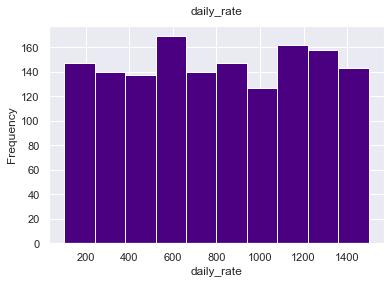

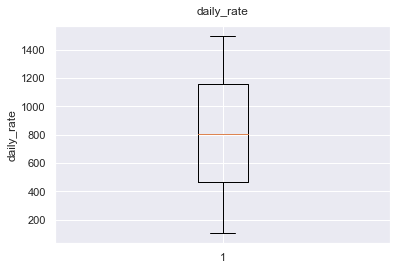

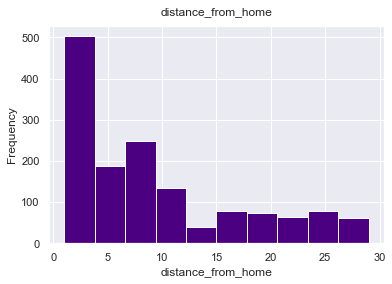

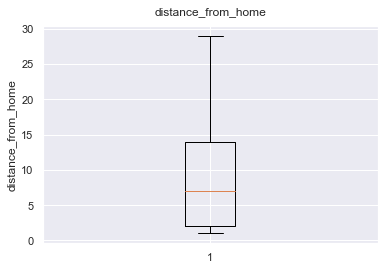

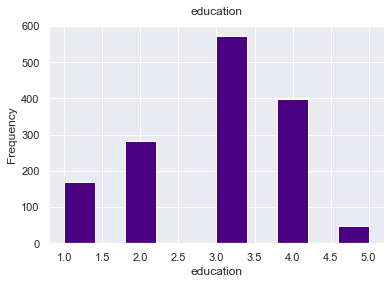

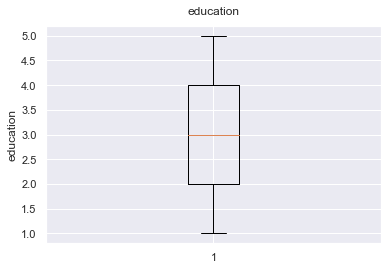

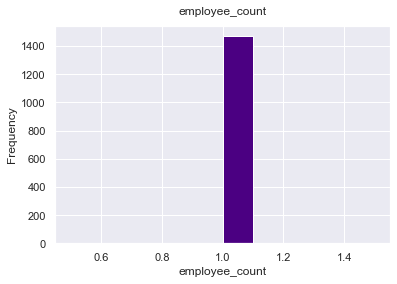

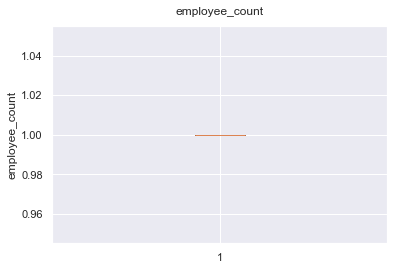

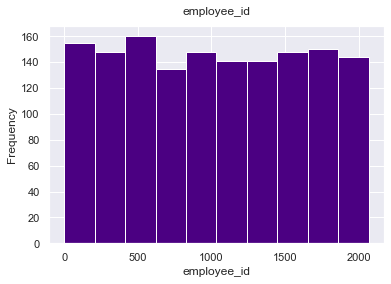

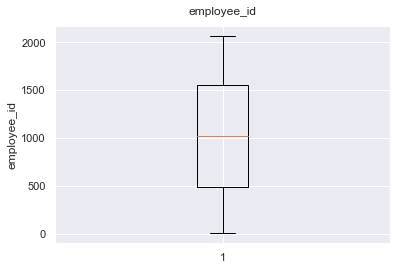

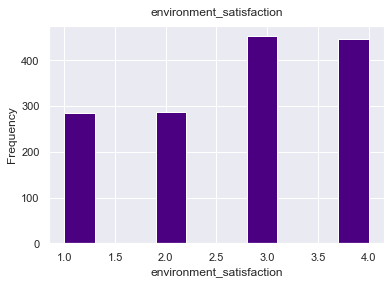

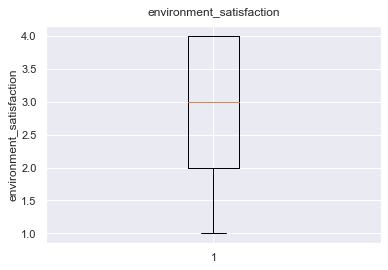

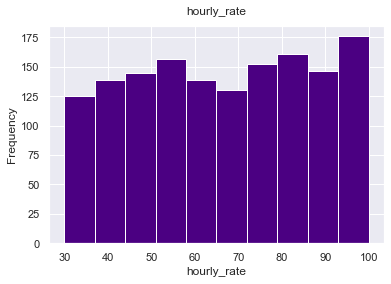

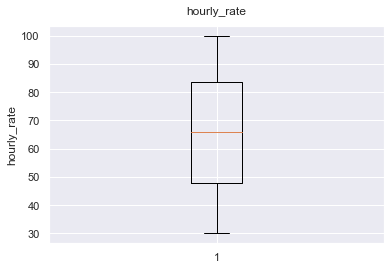

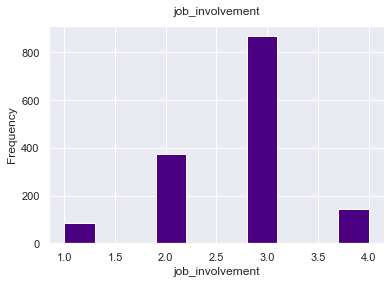

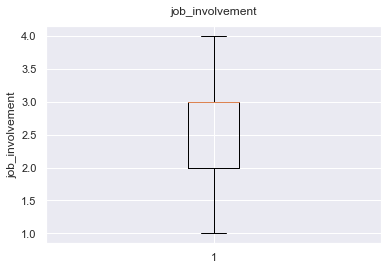

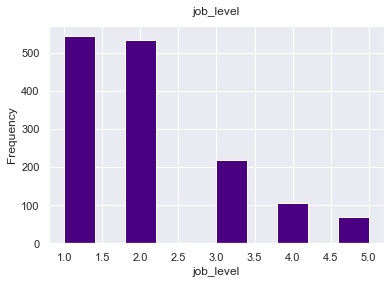

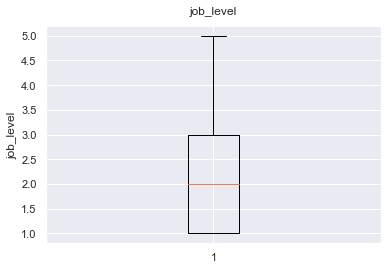

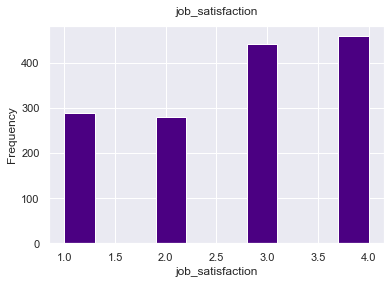

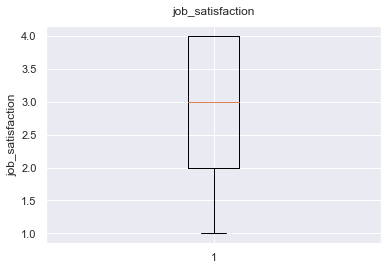

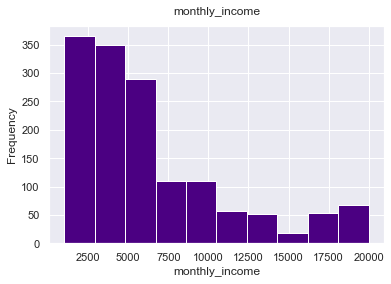

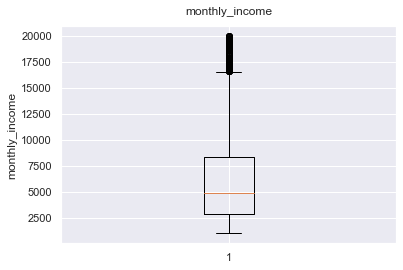

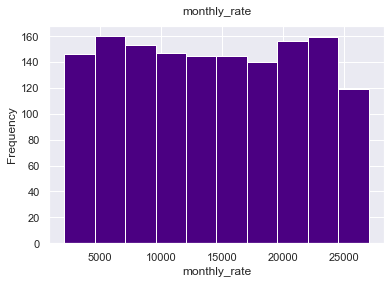

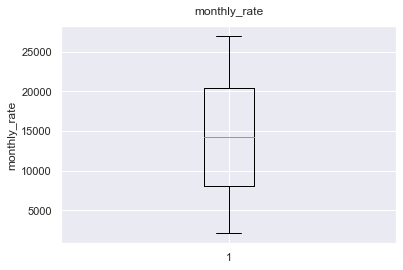

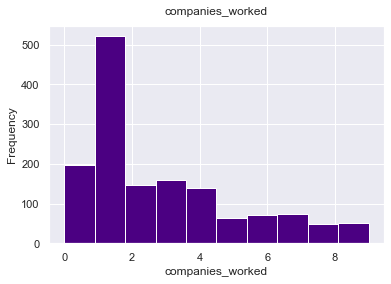

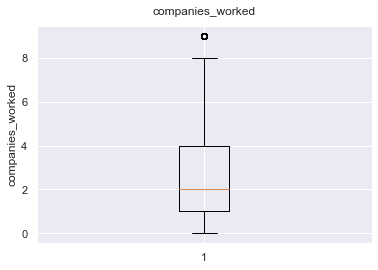

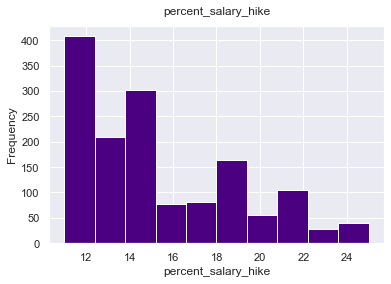

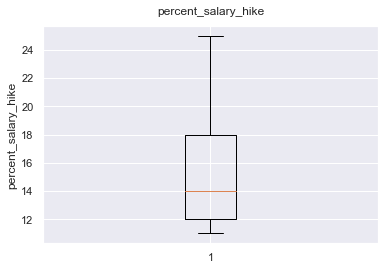

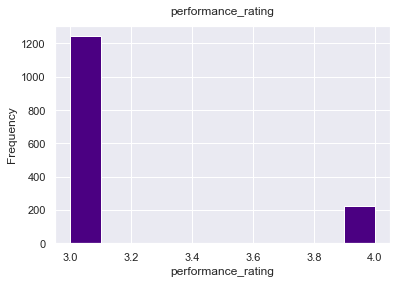

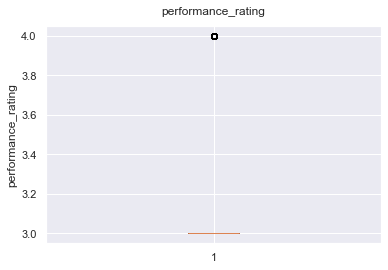

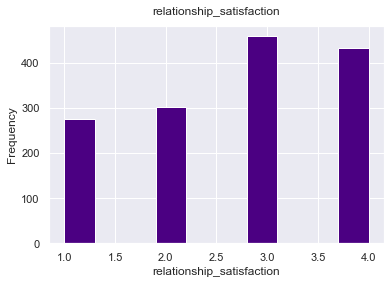

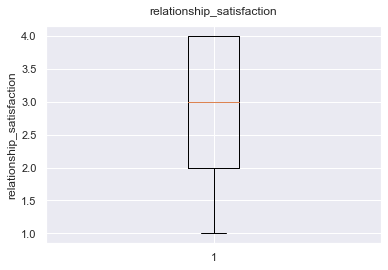

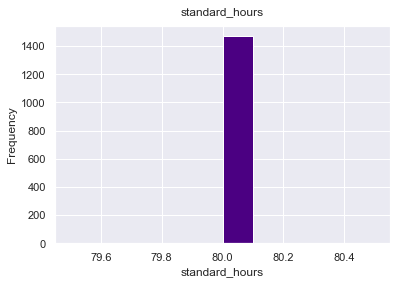

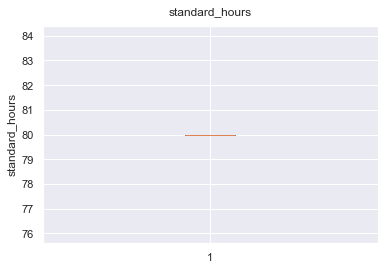

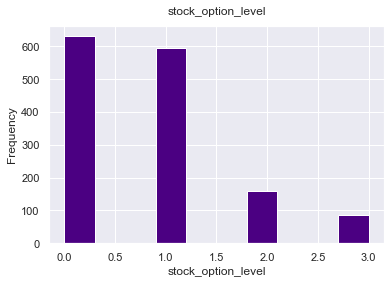

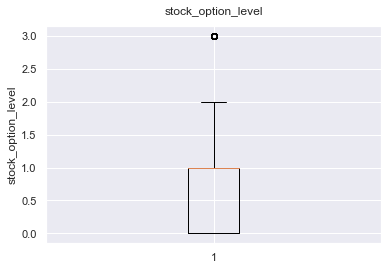

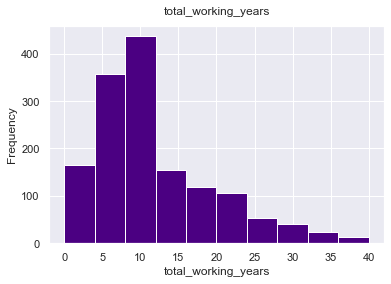

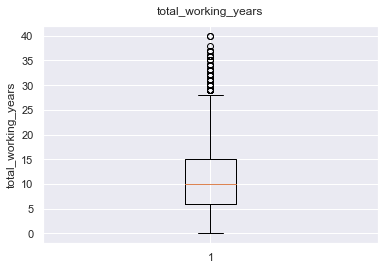

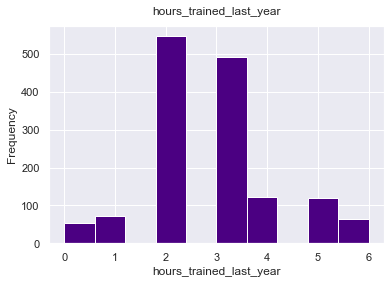

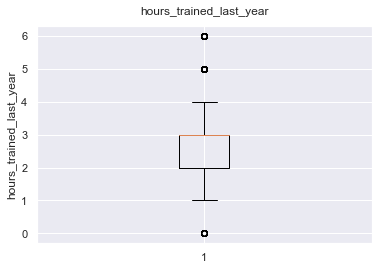

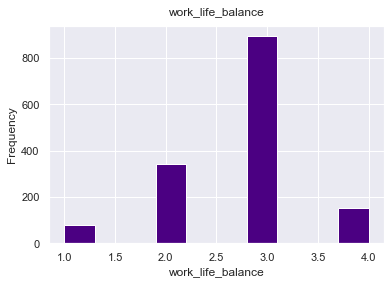

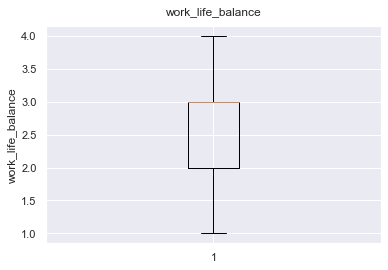

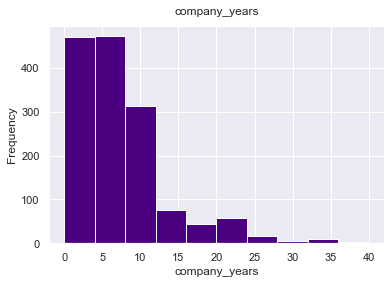

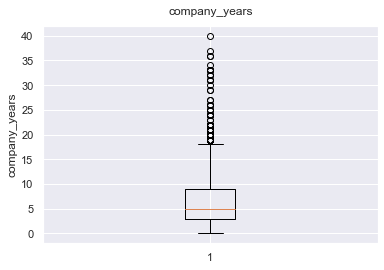

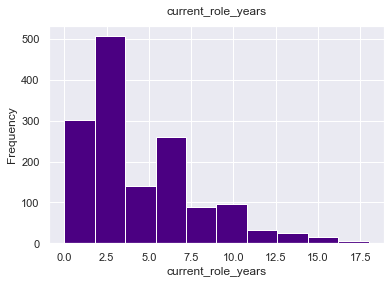

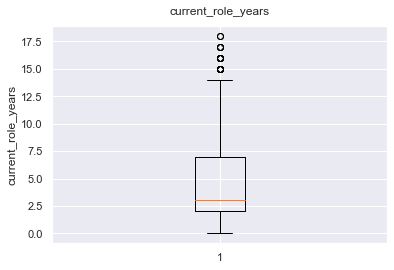

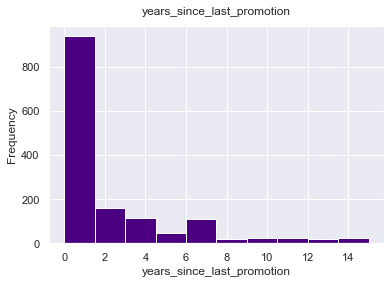

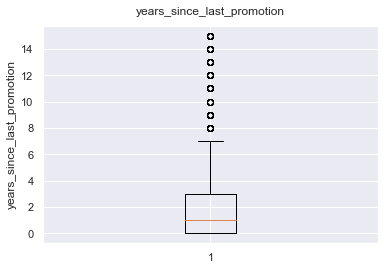

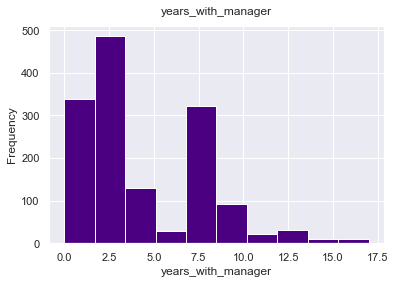

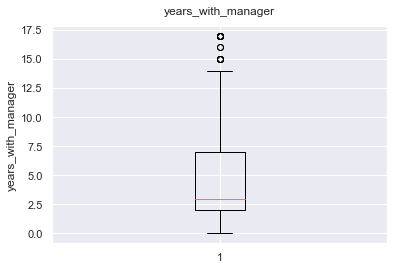

In [20]:
#loop through numeric features to view distributions
explore.plot_distributions(df, numeric)